In [44]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# 1.County

Valid for both upper case and lower case. Supports U.S county names. 
Input name should have county tag at the end (example Tippecanoe county, clay county). 

In [45]:
import geonamescache
gc = geonamescache.GeonamesCache()
co = gc.get_us_counties()
counties = []
for i in co:
    counties.append(i['name'].upper())
    if i['name'].find(' County') != -1:
        counties.append(i['name'].replace(' County','').upper())

def county_chk(strn):
    '''Function to detect the validity of the county name. Uses geonamescache library'''
    if strn.upper() not in counties:
        return 'Not valid'
    else:
        return 'Valid'


# 2.Cities

Valid for both upper case and lower case. Supports city names across the globe.


In [46]:
import geonamescache
gc = geonamescache.GeonamesCache()
c = gc.get_cities()
cities = [c[key]['name'] for key in list(c.keys())]
cities = list(map(lambda x:x.upper(), cities))
cities = [x for x in cities if str(x) != 'NAN']

def city_chk(strn):
    '''Function to detect the validity of the city name. Uses geonamescache library'''
    if strn.upper() in cities:
        return 'Valid'
    else:
        return 'Not Valid'

# 3.States

Valid for both upper case and lower case. Supports U.S state names. 

In [47]:
import geonamescache
gc = geonamescache.GeonamesCache()
st = gc.get_us_states()
stcode = []
states = []
for i in st:
    stcode.append(st[i]['code'])
    states.append(st[i]['name'].upper())

def state_chk(strn):
    '''Function to detect the validity of the state name. Uses geonamescache library'''
    chk = 0
    if strn.upper() in states or strn.upper() in stcode:
        return 'Valid'
    else:
        return 'Not Valid'

# 4.Countries

Valid for both upper case and lower case. Supports country names across the globe.

In [48]:
import pycountry
cntrs = list(pycountry.countries)
c_name = []
official_name = []
alpha_2 = []
alpha_3 = []
for i in cntrs:
    c_name.append(i.name.upper())
    if i.name.find(',')!=-1:
        c_name.append((i.name[i.name.find(',')+2:]+' '+i.name[:i.name.find(',')]).upper())
        for j in ('IRAN','RUSSIA','SOUTH KOREA','VIETNAM','BOLIVIA','TAIWAN','UK','SYRIA','VENEZUELA'):
            c_name.append(j)
    try:
        official_name.append(i.official_name.upper())
    except:
        pass
    alpha_2.append(i.alpha_2)
    alpha_3.append(i.alpha_3)
    

def country_chk(strn):
    '''Function to detect the validity of the country name. Uses pycountry library'''
    chk = 0
    if strn.upper() in c_name or strn.upper() in official_name or strn.upper() in alpha_2 or strn.upper() in alpha_3:
        return 'Valid'
    else:
        return 'Not Valid'

# 5.Currency_US Dollar

Satisfying Conditions:

1. Format: Currency(space optional)NNNN.DD(upto 2 decimals)
2. Currency : USD|usd|EUR|EURO|euro|eur|£|JPY|¥|CNY|GBP


In [49]:
def currency_chk(amount):
    '''Function to detect the validity of the US Cuurency. Uses regex library'''
    import re
    regex = re.compile(r'^(\$|USD|usd|EUR|EURO|euro|eur|£|JPY|¥|CNY|GBP)\s?(\d*(\d\.?|\.\d{1,2}))$')
    result = regex.match(amount)
    if result:
        return('Valid')
    else:
        return('Not Valid')
    

# 6.Phone Number

Supports following formats
1. 000-000-0000
2. 000 000 0000
3. 000.000.0000
4. (000)0000000
5. 000-0000
6. 000 0000
7. 000.0000
8. 0000000
9. 0000000000

Maximum of 12 digits is allowed


In [2]:
def phone_chk(number):
    '''Function to detect the phone numbers in US. Supports home/landline phone numbers and mobile numbers.
        Uses regex library'''
    if len(number)<=12 and len(number)>=6:
        import re
        regex=re.compile(r'^\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}')
        result = regex.match(number)
        if result:
            return 'Valid'
        else:
            return 'Not Valid'
    else:
        return 'Not Valid'

# 7.Credit Card

Uses Luhn Algorithm to detct the credit card detections

 https://en.wikipedia.org/wiki/Payment_card_number
 
 https://en.wikipedia.org/wiki/Luhn_algorithm
 
 https://www.geeksforgeeks.org/luhn-algorithm/
 
 Number of digits allowed : 13-19
        
Working Credit Cards under this Algo: 
1. AMEX
2. Bankcard
3. Diners Club enRoue
4. Discover Card
5. RuPay
6. InterPayment
7. JCB
8. Laser
9. Maestro
10. Dankort
11. MIR
12. NPS Pridnestrovie
13. Mastercard
14. Solo
15. Switch
16. Troy
17. Visa
18. UATP
19. Verve

In [51]:
def credit_card_chk(card_number):
    '''Function to detect whether credit card is valid or not by its card number. Dev. by using Luhn algo'''
    if len(card_number)>=13 and len(card_number)<=19:
        try:
            cc_list=[int(d) for d in str(card_number)]
            odd_digits = cc_list[-1::-2]
            #print(odd_digits)
            even_digits = cc_list[-2::-2]
            #print(even_digits)
            cc_digits_sum = 0
            cc_digits_sum += sum(odd_digits)
            for d in even_digits:
                d*=2
                if d > 9:
                    d= d-9 
                cc_digits_sum=cc_digits_sum + d
            if cc_digits_sum % 10==0:
                return 'Valid'
            else:
                return 'Not Valid'
        except:
            return 'Not Valid'
    else:
        return 'Not Valid'
        


# 8.Mail ID

Mail ID starting character should be aplhamnumeric. 
Should have 2 or 3 characters at the end after '.'

In [52]:
def email_chk(val):
    
    '''Function to detect the validity email. Uses regex library'''
    import re
    regex = '^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$'
    c=0
    if(re.search(regex,val)):  
         return 'Valid'
    else:
        return 'Not Valid'

# 9.URL

URL should start with http:// or https://, can have any alphanumeric domain name and must end with two or more characters after the '.'
It also incorporates URLs with IP or server addresses like "http://localhost:8889/notebooks/Functions_Data%20Profiling.ipynb"


In [53]:
def url_chk(val):
    
    '''Function to detect the validity email. Uses regex library'''
    import re
    a=0
    regex = re.compile(
            r'^(?:http|ftp)s?://' # http:// or https://
            r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' #domain...
            r'localhost|' #localhost...
            r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ...or ip
            r'(?::\d+)?' # optional port
            r'(?:/?|[/?]\S+)$', re.IGNORECASE)

    if (re.match(regex, val) is not None) == True:
        return 'Valid'
    else:
        return 'Not Valid'

# 10.Month

1. Works with Jan, jan, January, 01, 1 formats. 
2. If the input is using correct word for the month, irrespective of the lower, upper cases it will read ( Jan, JAn, jANUaRy)


In [54]:
month=['jan','january','feb','february','mar','march','apr','april','may','jun','june','jul','july','aug','august','sep','september','oct','october','nov','november','dec','december']
def month_chk(string):
    import re
    string=string.lower()
    if string in month:
        return 'Valid'
    else:
        return 'Not Valid'
    

# 11.Temperature

Works with
1. Positive and negative sign for the temperature
2. After decimal 2 digits only
3. Temperature symbol can be [CcFf]
4. Space or no-space between ineteger and the temp (CcFf) symbol


In [55]:
def temperature_chk(string):
    import re
    regex=re.compile(r"([+-]?((\d*(\d\.?|\.\d{1,2}))\s?°?(?i)(\W|^)(C|c|F|F)(\W|$)))")
    result=regex.match(string)
    if result:
        return 'Valid'
    else:
        return 'Not Valid'

# 12.Distance

In [56]:
def distance_chk(string):
    import re
    regex=re.compile(r"((\d*(\d\.?|\.\d{1,2}))\s?(?i)(\W|^)(KMS|km|miles|mile|INCH|M|feet|ft)(\W|$))")
    result=regex.match(string)
    if result:
        return 'Valid'
    else:
        return 'Not Valid'

# 13.Date

In [57]:
import datetime
def date_chk(date_time_str):
    chk = 0
    try:
        datetime.datetime.strptime(date_time_str, '%Y-%m-%d')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%y-%m-%d')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%Y-%d-%m')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%y-%d-%m')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%Y/%m/%d')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%y/%m/%d')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%Y/%d/%m')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%y/%d/%m')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%m-%d-%Y')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%m-%d-%y')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%d-%m-%Y')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%d-%m-%y')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%m/%d/%Y')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%m/%d/%y')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%d/%m/%Y')
        chk = 1
    except:
        pass

    try:
        datetime.datetime.strptime(date_time_str, '%d/%m/%y')
        chk = 1
    except:
        pass

    if chk == 1:
        return 'Valid'

    else:
        return 'Not Valid'

   

# 14.Time

In [58]:
def time_chk(date_time_str):
    chk = 0
    try:
        datetime.datetime.strptime(date_time_str, '%H:%M')
        chk = 1
    except:
        pass
    try:
        datetime.datetime.strptime(date_time_str, '%H:%M:%S')
        chk = 1
    except:
        pass
    try:
        datetime.datetime.strptime(date_time_str, '%H:%M:%S.%f')
        chk = 1
    except:
        pass
    if chk == 1:
        return 'Valid'

    else:
        return 'Not Valid'


# 15. Animals

In [59]:
import urllib.request
target_url = "https://gist.githubusercontent.com/atduskgreg/3cf8ef48cb0d29cf151bedad81553a54/raw/82f142562cf50b0f6fb8010f890b2f934093553e/animals.txt"
animals = list()
for line in urllib.request.urlopen(target_url):
        animals.append(line.decode('utf-8')[:-1].lower())
def animal_chk(string):
    if string.lower() in animals:
        return 'Valid'
    else:
        return 'Not Valid'

# 16. Name

In [60]:
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
import en_core_web_sm
nlp = en_core_web_sm.load()

In [61]:
def name_chk(string):
    test = nlp(string.lower())
    for X in test:
        if X.ent_type_=='PERSON':
            return 'Valid'
    return 'Not Valid'

# 17. Gender

In [62]:
def gender_chk(string):
    if string.lower() in ['male','female']:
        return 'Valid'
    if string.lower() in ['m','f']:
        return 'Valid'
    return 'Not Valid'

# 18. Binary

In [63]:
def binary_chk(string):
    try:
        if int(string) in [1,0]:
            return 'Valid'
    except:
        pass
    if string.lower() in ['true','false']:
        return 'Valid'
    if string.lower() in ['t','f']:
        return 'Valid'
    return 'Not Valid'

# Graphs

In [64]:
#data input is csv file path 

In [65]:
def grph(data):
    data_1=pd.read_csv(data)
    import matplotlib.pyplot as plt
    from matplotlib.backends.backend_pdf import PdfPages
    col_num=[]
    col_str=[]
    for col in data_1:
        try:
            pd.to_numeric(data_1[col])
            col_num.append(col)
        except:
            col_str.append(col)
    y=len(col_num)
    x=(y//2)+1 
    with PdfPages('Numeric EDA.pdf') as pdf:
        plt.figure(figsize=(4*x,5*x))
        for i in range(1,y+1):
            plt.subplot(x,2,i,facecolor=(1,1,1))
            plt.grid(False)
            #print(data[col_num[i-1]])
            plt.hist(data_1[col_num[i-1]],bins=10,color="lightseagreen")
            plt.title(col_num[i-1], fontsize=20)
            #plt.text(0.5,0.5,print('Mean', data[col_num[i-1]].mean()))
            plt.suptitle('Numeric EDA',fontsize=25)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

# Reading the csv file, checking the column characteristic and assigning the accuracy score:




Preparing the FileS List: 

In [66]:
import pandas as pd
#path =r'C:\Users\rahul\OneDrive\Desktop\Samtec\\' # use your path, replace the last backslash with filename to run for a single file
filename= r'C:\Users\rahul\OneDrive\Desktop\Samtec\avocado.csv'

lst = dict()

df = pd.read_csv(filename, index_col=None, header=0)
lst[filename] = df

#print(lst)
    


Sampling the data:

In [67]:
def sample(data):
    '''Random sampling of data'''
    if data.shape[0] > 999:
        return data.sample(frac=0.3, random_state=1)
    else:
        return data

List of entity columns to be tested

In [68]:
funclist = [county_chk,city_chk,state_chk,country_chk,currency_chk,phone_chk,credit_card_chk,email_chk,url_chk,date_chk,time_chk,distance_chk,temperature_chk,month_chk,animal_chk,name_chk,gender_chk,binary_chk]
funclist_num = [phone_chk,credit_card_chk,binary_chk]

Confidence Score Function:

In [69]:
def cscore(data):
    '''Function to calculate the confidence score for each column'''
    import random
    print('\nCONFIDENCE SCORES:\n ')
    data = sample(data)
    data_dict = data.to_dict()
    from prettytable import PrettyTable
    x = PrettyTable()
    x.field_names = ["Column Name", "Tested Entity", "Confidence Score"]
    
    for i in data_dict.keys():
        #print(i,': ')
        u = data[i].nunique()
        try:
            pd.to_numeric(data[i])
            func = funclist_num
        except:
            func = funclist
        for j in func:
            #start=0
            #end=0
            #start = timeit.timeit()
            func_str = str(j)[10:str(j).find('at ')-5]
            if func_str == 'name' and len(data_dict[i].items())>300:
                d2 = dict((k,j(str(v))) for k, v in random.sample(data_dict[i].items(),k=300))
            else:    
                d2 = dict((k,j(str(v))) for k, v in data_dict[i].items())
            d3= {k:(1 if v=='Valid' else 0 ) for (k,v) in d2.items()}
            a=[v for v in d3.values()]
            accuracy=round((sum(a)/len(a))*100,2)
            #end = timeit.timeit()
            #print(str(j),(end - start))
            if func_str == 'binary' and u!=2:
                accuracy = 0
            if accuracy != 0:
                l=[]
                l.append(str(i))
                #print('1',l)
                l.append(str(j)[9:str(j).find('at ')-5])
                l.append(str(accuracy))
                #print('2',l)
                x.add_row(l)
    print(x)

In [79]:
import matplotlib.pyplot as plt
def eda(data):
    rw = data.shape[0]
    print('Rows: ',str(rw))
    print('Columns: ',str(data.shape[1]),'\n')
    pk = []
    mis = []
    from prettytable import PrettyTable
    #y = PrettyTable()
    #y.field_names = ["Value", "Count"]
    for col in data:
        print('Column Name:',col)
        u = data[col].nunique()
        print('Unique Value Count:',u)
        if u == rw:
            pk.append(col)
        n = data[col].size - data[col].count()
        print('Null Count:',n)
        if n != 0:
            mis.append(col)
        try:
            pd.to_numeric(data[col])
            print('Mean', data[col].mean())
            print('Median',data[col].median())
            
            plt.style.use('ggplot')
            plt.hist(data[col], bins=10)
            plt.show()
            print('\n')
            continue
        except:
            freq = data[col].value_counts()
            print('Top Three Frequency Values:')
            y = PrettyTable()
            y.field_names = ["Value", "Count"]
            for i in range(3):
                t3f=[]
                try:
                    val = freq[i]
                except:
                    break
                if val == 1:
                    if i == 0:
                        print('N/A')
                    break

                t3f.append(freq.keys()[i])
                t3f.append(val)
                y.add_row(t3f)
            print(y)
        print('\n')
    print ('Possible Primary Key(s):',pk)
    print ('Columns with missing data:',mis,'\n')
    print('\n')
        



---------------------- avocado.csv ----------------------
DATA SUMMARY:

Rows:  18249
Columns:  14 

Column Name: Unnamed: 0
Unique Value Count: 53
Null Count: 0
Mean 24.232231903117977
Median 24.0


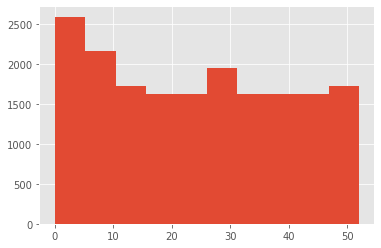



Column Name: Date
Unique Value Count: 169
Null Count: 0
Top Three Frequency Values:
+------------+-------+
|   Value    | Count |
+------------+-------+
| 2015-08-30 |  108  |
| 2017-06-04 |  108  |
| 2017-01-29 |  108  |
+------------+-------+


Column Name: AveragePrice
Unique Value Count: 259
Null Count: 0
Mean 1.4059784097758825
Median 1.37


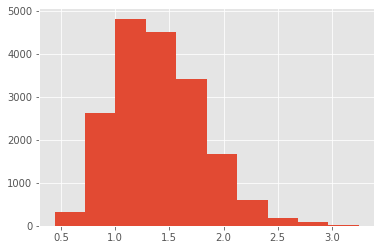



Column Name: Total Volume
Unique Value Count: 18237
Null Count: 0
Mean 850644.0130089332
Median 107376.76


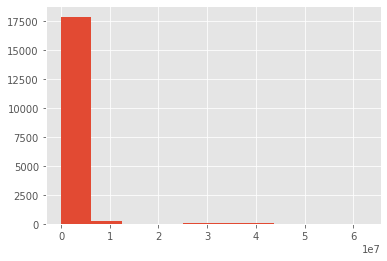



Column Name: 4046
Unique Value Count: 17702
Null Count: 0
Mean 293008.42453066056
Median 8645.3


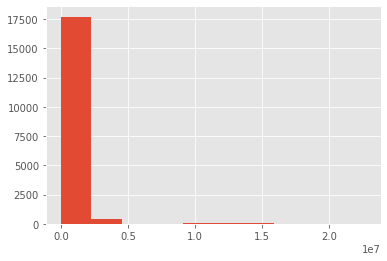



Column Name: 4225
Unique Value Count: 18103
Null Count: 0
Mean 295154.56835607596
Median 29061.02


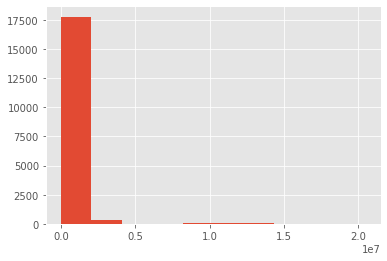



Column Name: 4770
Unique Value Count: 12071
Null Count: 0
Mean 22839.735992657315
Median 184.99


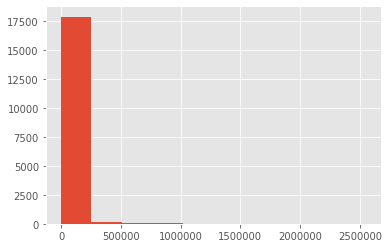



Column Name: Total Bags
Unique Value Count: 18097
Null Count: 0
Mean 239639.20205983953
Median 39743.83


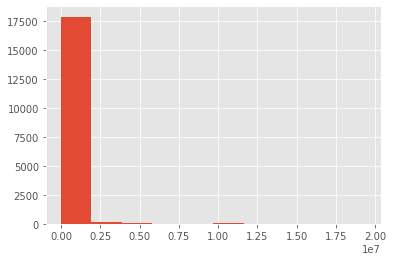



Column Name: Small Bags
Unique Value Count: 17321
Null Count: 0
Mean 182194.68669571026
Median 26362.82


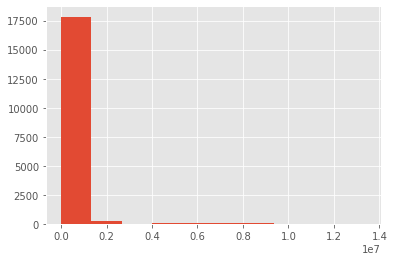



Column Name: Large Bags
Unique Value Count: 15082
Null Count: 0
Mean 54338.08814455636
Median 2647.71


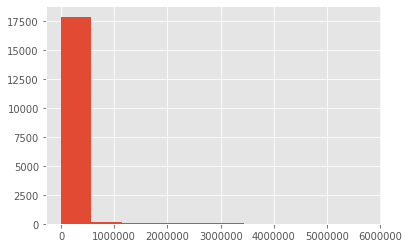



Column Name: XLarge Bags
Unique Value Count: 5588
Null Count: 0
Mean 3106.4265072058793
Median 0.0


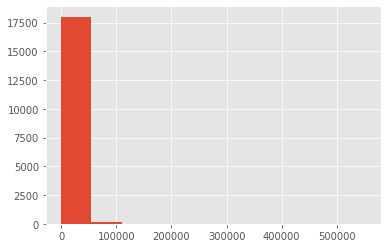



Column Name: type
Unique Value Count: 2
Null Count: 0
Top Three Frequency Values:
+--------------+-------+
|    Value     | Count |
+--------------+-------+
| conventional |  9126 |
|   organic    |  9123 |
+--------------+-------+


Column Name: year
Unique Value Count: 4
Null Count: 0
Mean 2016.1478985149872
Median 2016.0


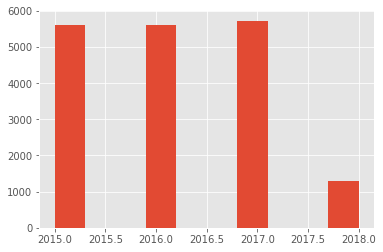



Column Name: region
Unique Value Count: 54
Null Count: 0
Top Three Frequency Values:
+--------------+-------+
|    Value     | Count |
+--------------+-------+
| SanFrancisco |  338  |
|     West     |  338  |
|  LosAngeles  |  338  |
+--------------+-------+


Possible Primary Key(s): []
Columns with missing data: [] 




CONFIDENCE SCORES:
 
+--------------+---------------+------------------+
| Column Name  | Tested Entity | Confidence Score |
+--------------+---------------+------------------+
|     Date     |      date     |      100.0       |
| Total Volume |      phone    |      13.66       |
|     4046     |      phone    |       5.99       |
|     4225     |      phone    |       6.67       |
|     4770     |      phone    |       0.38       |
|  Total Bags  |      phone    |       5.21       |
|  Small Bags  |      phone    |       3.53       |
|  Large Bags  |      phone    |       1.32       |
|    region    |     county    |      18.58       |
|    region    |      city  

In [80]:
import os
for key in lst:
    print('\n')
    print('----------------------',os.path.basename(key),'----------------------')
    print('DATA SUMMARY:\n')
    eda(lst[key])
    cscore(lst[key])
    